# Image Classification

In [51]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import matplotlib.image as mpimg
import seaborn as sns

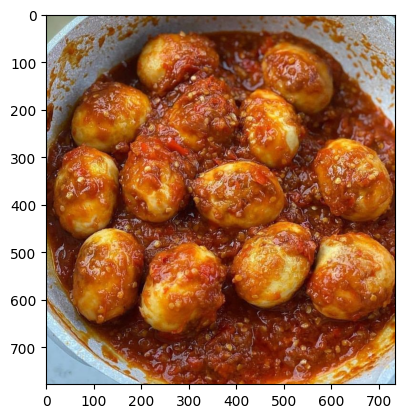

In [52]:
# Read Images
img = mpimg.imread('Dataset/Train/egg ballado/4c2cd42040c108f95bb2484ee0b00590.jpg')

# Output Images
plt.imshow(img)

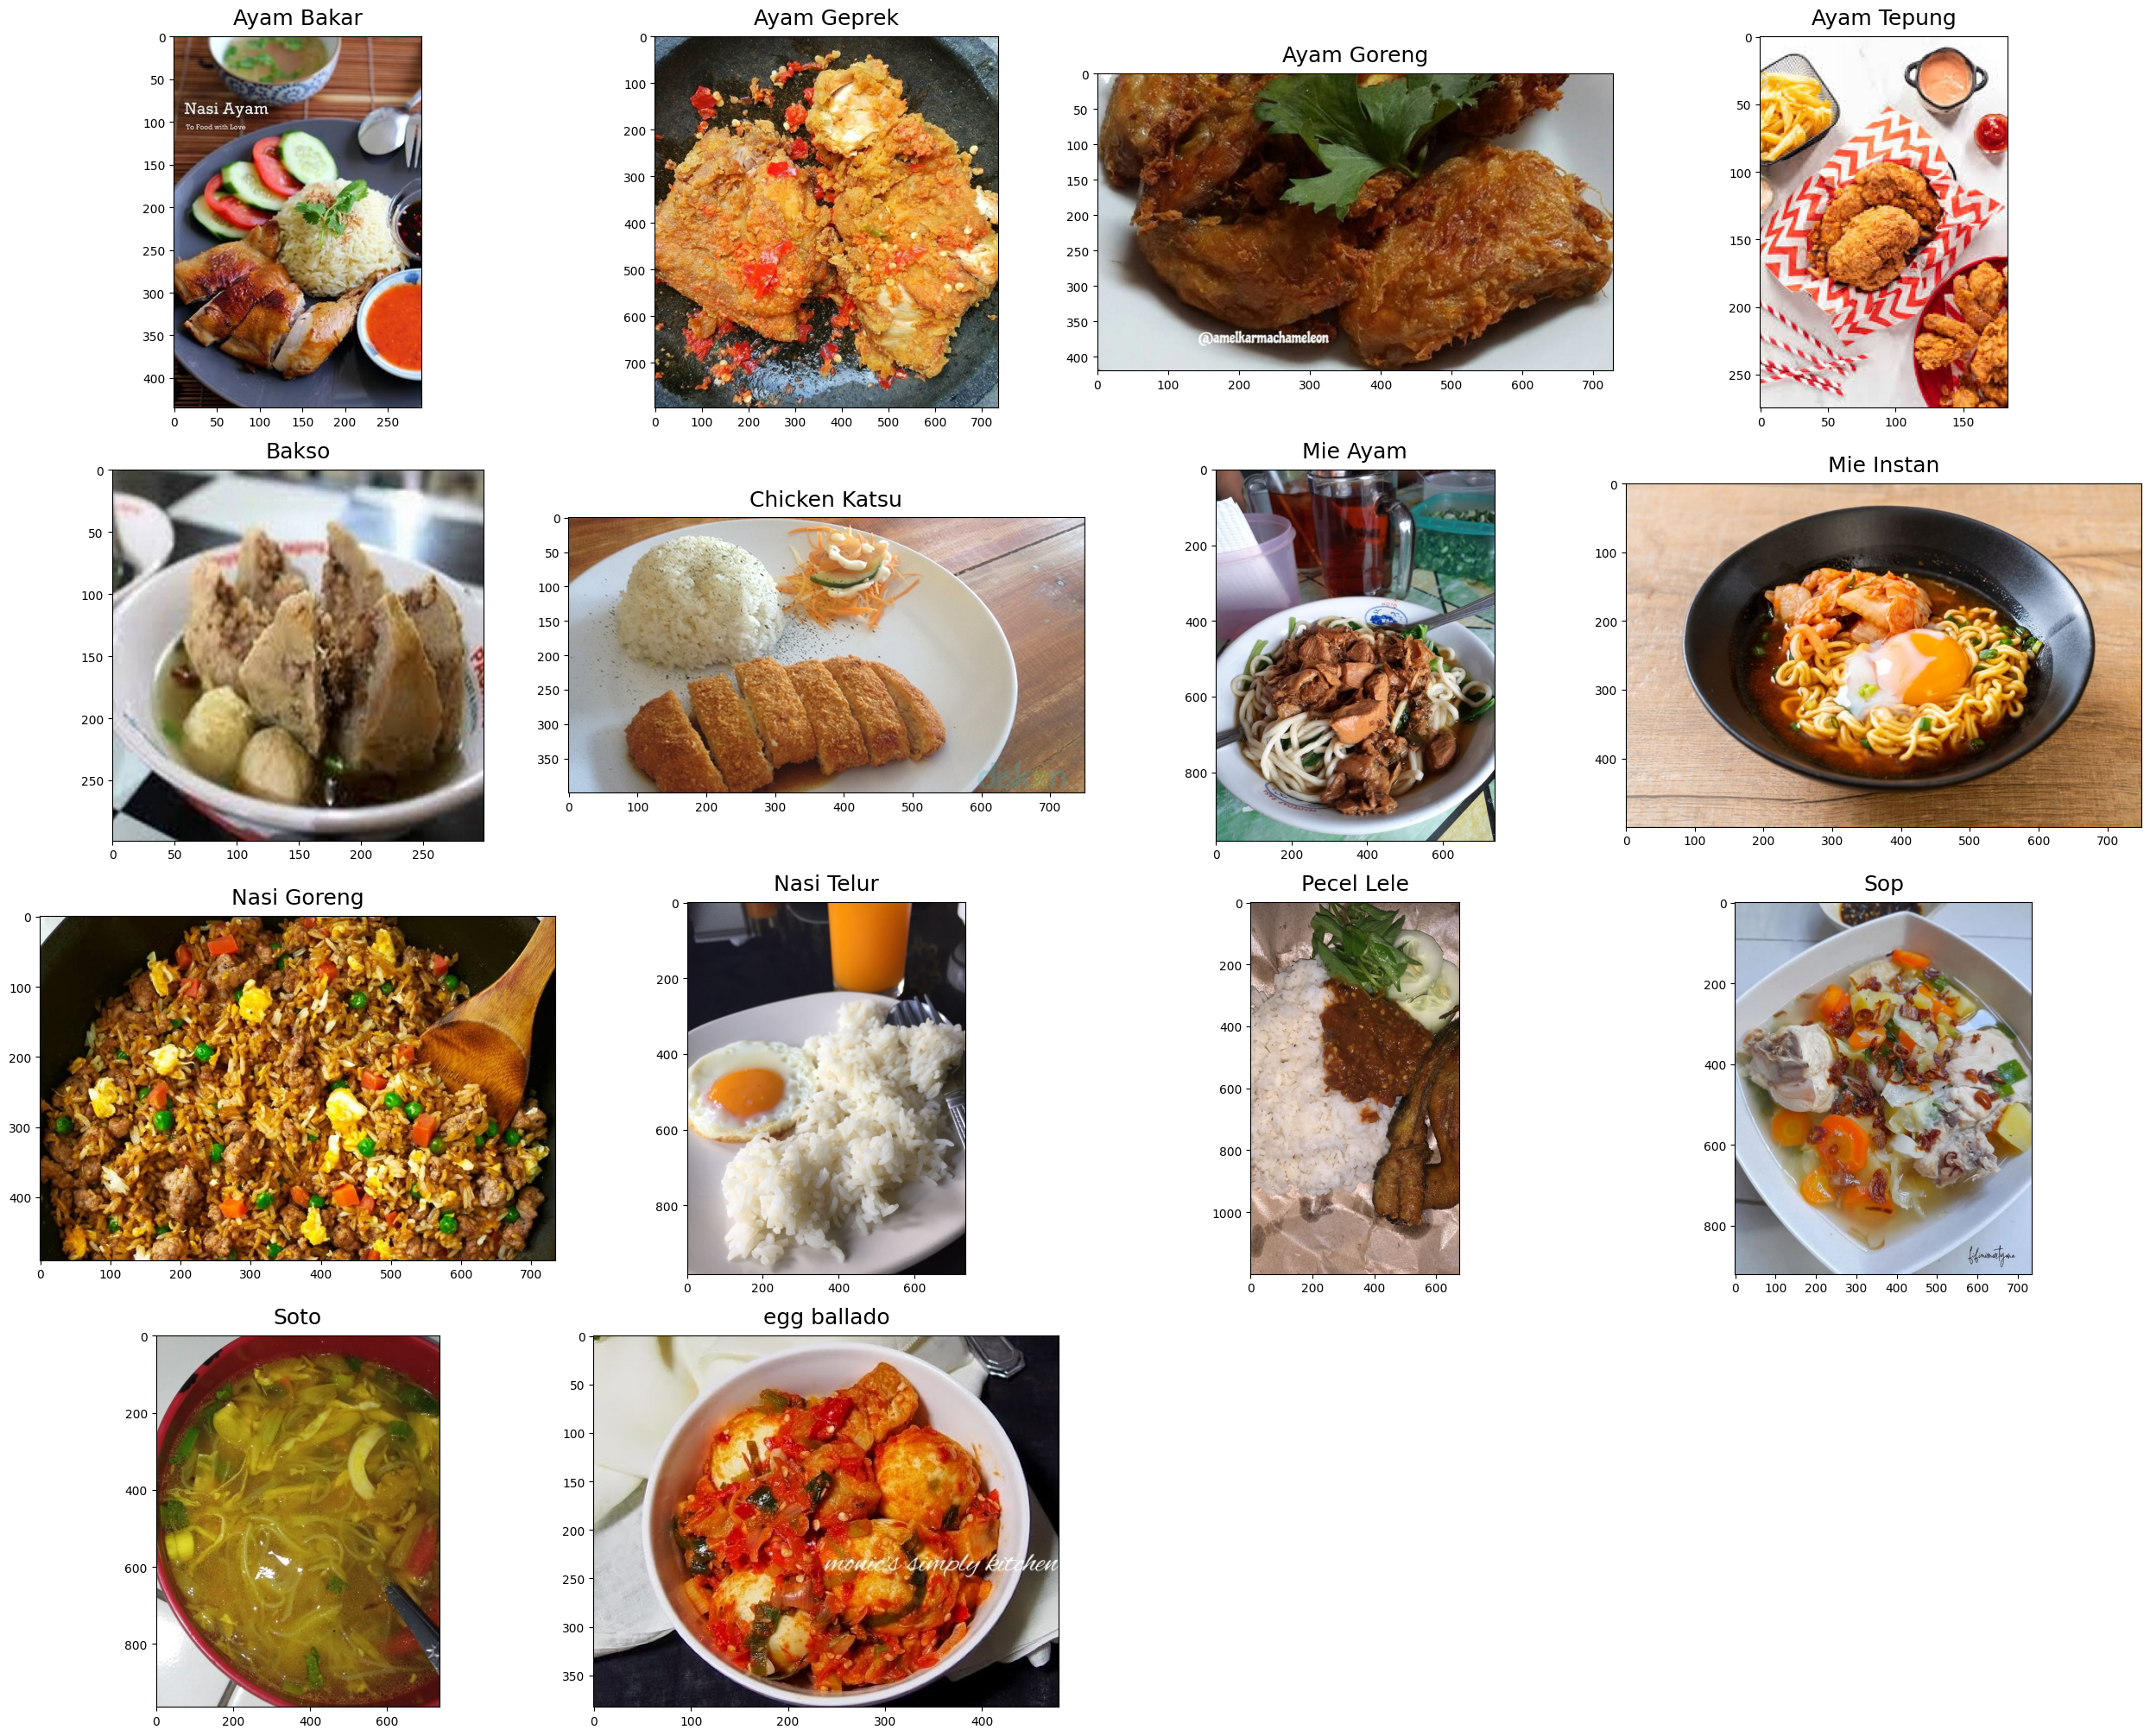

In [53]:
train_dir = "Dataset\Train"
test_dir = "Dataset\Test"
images = []

for food_folder in sorted(os.listdir(train_dir)):
    food_items = os.listdir(train_dir + '/' + food_folder)
    food_selected = np.random.choice(food_items)
    images.append(os.path.join(train_dir,food_folder,food_selected))

fig=plt.figure(1, figsize=(25, 25))

for subplot,image_ in enumerate(images):
    category=image_.split('\\')[-2]
    imgs = plt.imread(image_)
    a,b,c=imgs.shape
    fig=plt.subplot(5, 4, subplot+1)
    fig.set_title(category, pad = 10,size=18)
    plt.imshow(imgs)

plt.tight_layout()

In [54]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1 / 255,
                                                                rotation_range=40,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                shear_range=0.2,
                                                                zoom_range=0.4,
                                                                horizontal_flip=True)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [55]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=62,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(224, 224),
                                                    batch_size=62,
                                                    class_mode='categorical')

Found 2705 images belonging to 14 classes.
Found 934 images belonging to 14 classes.


Pakai MobileNet ngga usah pakai link kaya Inception, langsung dipanggil aja tinggal ganti versionnya aja.

Referensi: https://github.com/EhabR98/Transfer-Learning-with-MobileNetV2/blob/main/Transfer_learning_with_MobileNet_v1-Copy1.md#3

Sumber coursera : https://colab.research.google.com/drive/1gfaEHcPhTgab4emO8FE8f-TxdZ4mTLV8?authuser=1 (Cuma pakai inception sih)

In [56]:
# # Convert generator to TensorFlow dataset
# train_dataset = tf.data.Dataset.from_generator(
#     lambda: train_generator,
#     output_types=(tf.float32, tf.float32),
#     output_shapes=([None, 224, 224, 3], [None, 14])
# )

# # Repeat the dataset
# train_dataset = train_dataset.repeat()

In [57]:
import tensorflow as tf
# Loading the Pre-trained MobileNet Model
from tensorflow.keras.applications import MobileNet
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

#Freezing the Base Layer
for layer in base_model.layers:
    layer.trainable = False

# last_layer = base_model.get_layer('conv_dw_8_relu')

# base_model.summary()

In [58]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath='Model/model.weights.keras',
                                                                monitor='val_accuracy',
                                                                mode='max',
                                                                save_best_only=True)

Lanjut masukin model

In [59]:
model1 = tf.keras.models.Sequential([
  base_model,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.BatchNormalization(momentum=0.5),
  tf.keras.layers.Dense(14, activation='softmax')  # Menggunakan softmax karena ini adalah klasifikasi multikelas
])

model1.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='categorical_crossentropy',  # Menggunakan categorical_crossentropy untuk klasifikasi multikelas
              metrics=['accuracy'])

In [60]:
# AKURASI AWALNYA 0.2 

history_mobileNet=model1.fit(train_generator,
                    validation_data=test_generator,
                    epochs=10, verbose=1)  # Sesuaikan jumlah langkah per epoch sesuai kebutuhan

Epoch 1/10


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


44/44 ━━━━━━━━━━━━━━━━━━━━ 234s 5s/step - accuracy: 0.5382 - loss: 1.6667 - val_accuracy: 0.6552 - val_loss: 1.1330
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 203s 4s/step - accuracy: 0.7816 - loss: 0.7038 - val_accuracy: 0.7120 - val_loss: 0.8946
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 177s 4s/step - accuracy: 0.7955 - loss: 0.6266 - val_accuracy: 0.7173 - val_loss: 0.8693
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 210s 5s/step - accuracy: 0.8394 - loss: 0.4874 - val_accuracy: 0.7216 - val_loss: 0.9384
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 181s 4s/step - accuracy: 0.8505 - loss: 0.4499 - val_accuracy: 0.7313 - val_loss: 0.9263
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 169s 4s/step - accuracy: 0.8880 - loss: 0.3545 - val_accuracy: 0.7527 - val_loss: 0.8355
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 166s 4s/step - accuracy: 0.8863 - loss: 0.3545 - val_accuracy: 0.7505 - val_loss: 0.8688
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1739s 40s/step - accuracy: 0.8815 - loss: 0.3446 - val_accuracy: 0.7388 - val_loss: 

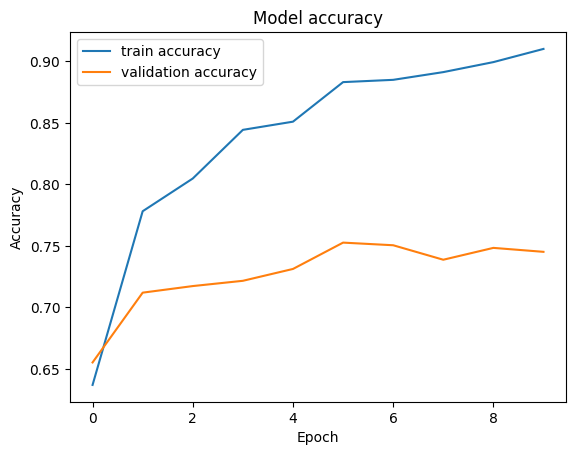

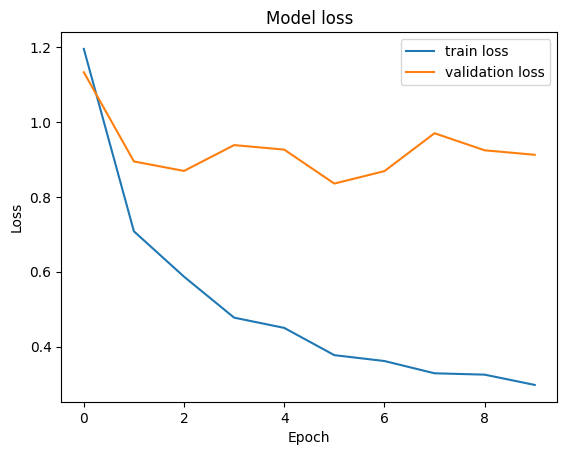

In [61]:
def plot_accuracy(history):
    plt.plot(history_mobileNet.history['accuracy'],label='train accuracy')
    plt.plot(history_mobileNet.history['val_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.show()

def plot_loss(history):
    plt.plot(history_mobileNet.history['loss'],label="train loss")
    plt.plot(history_mobileNet.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.show()

plot_accuracy(history_mobileNet)
plot_loss(history_mobileNet)

In [62]:
from sklearn.metrics import f1_score, classification_report
import pandas as pd

# Membuat prediksi pada data uji
y_pred = model1.predict(test_generator)
y_true = test_generator.classes

# Menggunakan argmax untuk mendapatkan kelas prediksi
y_pred_classes = np.argmax(y_pred, axis=1)

# Menghitung F1 score untuk setiap kelas
f1_scores = f1_score(y_true, y_pred_classes, average=None)

# Membuat laporan klasifikasi yang mencakup presisi, recall, dan F1 score untuk setiap kelas
report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys())

# Menampilkan F1 score untuk setiap kelas dalam tabel
f1_scores_table = pd.DataFrame({'Class': test_generator.class_indices.keys(), 'F1 Score': f1_scores})
print(f1_scores_table)

# Menampilkan laporan klasifikasi
print("Classification Report:\n", report)


16/16 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step
            Class  F1 Score
0      Ayam Bakar  0.166065
1     Ayam Geprek  0.065217
2     Ayam Goreng  0.045113
3     Ayam Tepung  0.085714
4           Bakso  0.117647
5   Chicken Katsu  0.021739
6        Mie Ayam  0.094595
7      Mie Instan  0.044944
8     Nasi Goreng  0.169697
9      Nasi Telur  0.101695
10     Pecel Lele  0.070423
11            Sop  0.030769
12           Soto  0.141176
13    egg ballado  0.034483
Classification Report:
                precision    recall  f1-score   support

   Ayam Bakar       0.16      0.17      0.17       135
  Ayam Geprek       0.07      0.06      0.07        50
  Ayam Goreng       0.07      0.03      0.05        87
  Ayam Tepung       0.08      0.09      0.09        66
        Bakso       0.12      0.12      0.12       117
Chicken Katsu       0.02      0.02      0.02        45
     Mie Ayam       0.06      0.18      0.09        38
   Mie Instan       0.11      0.03      0.04        70
  Nasi Goreng       0

Inception

In [17]:
import tensorflow as tf
# Loading the Pre-trained MobileNet Model
from tensorflow.keras.applications import ResNet101
import tensorflow as tf
import tensorflow_hub as hub

# inception_v3 = "https://tfhub.dev/google/imagenet/inception_v3/classification/5"
base_model_i = ResNet101(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


#Freezing the Base Layer
for layer in base_model_i.layers:
    layer.trainable = False

last_layer = base_model_i.get_layer('mixed4')

# base_model_i.summary()

In [16]:
# train_generator = train_generator.repeat()

https://www.kaggle.com/code/mehrdadsadeghi/fashionmnist-cnn-with-tensorflow-confusionmatrix

In [ ]:
model2 = tf.keras.models.Sequential([
  base_model_i,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.BatchNormalization(momentum=0.9),
  tf.keras.layers.Dense(14, activation='softmax')  # Menggunakan softmax karena ini adalah klasifikasi multikelas
])

model2.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              loss='categorical_crossentropy',  # Menggunakan categorical_crossentropy untuk klasifikasi multikelas
              metrics=['accuracy'])

In [ ]:
# AKURASI AWALNYA 0.2 

history_inceptionV3=model2.fit(train_generator,
                    validation_data=test_generator,
                    epochs=30, steps_per_epoch=20, verbose=1, validation_steps=5)  # Sesuaikan jumlah langkah per epoch sesuai kebutuhan

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 127s 4s/step - accuracy: 0.2955 - loss: 2.4294 - val_accuracy: 0.2000 - val_loss: 9.0708
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 59s 3s/step - accuracy: 0.5730 - loss: 1.2592 - val_accuracy: 0.5800 - val_loss: 1.3242
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 59s 3s/step - accuracy: 0.5880 - loss: 1.3627 - val_accuracy: 0.6000 - val_loss: 1.5089
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 62s 3s/step - accuracy: 0.5785 - loss: 1.3186 - val_accuracy: 0.5300 - val_loss: 1.5943
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 0.6085 - loss: 1.2209 - val_accuracy: 0.6500 - val_loss: 1.2064
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 62s 3s/step - accuracy: 0.6693 - loss: 1.1062 - val_accuracy: 0.7000 - val_loss: 0.9126
Epoch 7/30
14/20 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.5967 - loss: 1.2691

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


20/20 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.6009 - loss: 1.2175 - val_accuracy: 0.1600 - val_loss: 20.0885
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step - accuracy: 0.6641 - loss: 1.0864 - val_accuracy: 0.5900 - val_loss: 1.2377
Epoch 9/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.6782 - loss: 0.9135 - val_accuracy: 0.5000 - val_loss: 1.9538
Epoch 10/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 0.7224 - loss: 0.8503 - val_accuracy: 0.6200 - val_loss: 1.0142
Epoch 11/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.7093 - loss: 0.9539 - val_accuracy: 0.6900 - val_loss: 0.9627
Epoch 12/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 56s 3s/step - accuracy: 0.6678 - loss: 0.9496 - val_accuracy: 0.6600 - val_loss: 1.1562
Epoch 13/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 0.7527 - loss: 0.8456 - val_accuracy: 0.6400 - val_loss: 0.9036
Epoch 14/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.7200 - loss: 0.9014 - val_accuracy: 0.6000 - val_loss: 1.47

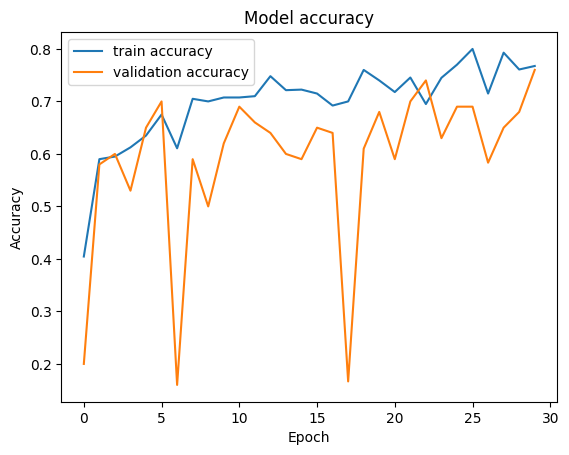

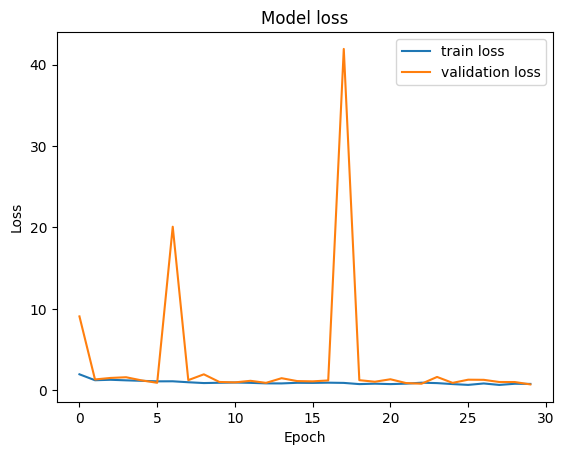

In [ ]:
def plot_accuracy(history):
    plt.plot(history_inceptionV3.history['accuracy'],label='train accuracy')
    plt.plot(history_inceptionV3.history['val_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.show()

def plot_loss(history):
    plt.plot(history_inceptionV3.history['loss'],label="train loss")
    plt.plot(history_inceptionV3.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.show()

plot_accuracy(history_inceptionV3)
plot_loss(history_inceptionV3)

In [ ]:
from sklearn.metrics import f1_score, classification_report
import pandas as pd

# Membuat prediksi pada data uji
y_pred = model2.predict(test_generator)
y_true = test_generator.classes

# Menggunakan argmax untuk mendapatkan kelas prediksi
y_pred_classes = np.argmax(y_pred, axis=1)

# Menghitung F1 score untuk setiap kelas
f1_scores = f1_score(y_true, y_pred_classes, average=None)

# Membuat laporan klasifikasi yang mencakup presisi, recall, dan F1 score untuk setiap kelas
report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys())

# Menampilkan F1 score untuk setiap kelas dalam tabel
f1_scores_table = pd.DataFrame({'Class': test_generator.class_indices.keys(), 'F1 Score': f1_scores})
print(f1_scores_table)

# Menampilkan laporan klasifikasi
print("Classification Report:\n", report)


44/44 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step
            Class  F1 Score
0      Ayam Bakar  0.175676
1     Ayam Geprek  0.000000
2     Ayam Goreng  0.017094
3     Ayam Tepung  0.063291
4           Bakso  0.106122
5   Chicken Katsu  0.050000
6        Mie Ayam  0.000000
7      Mie Instan  0.022472
8     Nasi Goreng  0.127389
9      Nasi Telur  0.059701
10     Pecel Lele  0.069565
11            Sop  0.027778
12           Soto  0.109290
13    egg ballado  0.000000
Classification Report:
                precision    recall  f1-score   support

   Ayam Bakar       0.16      0.19      0.18       135
  Ayam Geprek       0.00      0.00      0.00        13
  Ayam Goreng       0.03      0.01      0.02        87
  Ayam Tepung       0.05      0.08      0.06        66
        Bakso       0.10      0.11      0.11       117
Chicken Katsu       0.05      0.05      0.05        20
     Mie Ayam       0.00      0.00      0.00        38
   Mie Instan       0.05      0.01      0.02        70
  Nasi Goreng       0